<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap8/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap8/'
os.chdir(folder)
print(os.getcwd()) 
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap8
evaluate.py
load_data.py
train_test.py
show_images.py
trial.ipynb
model.py
load_data.cpython-36.pyc
show_images.cpython-36.pyc
model.cpython-36.pyc
train_test.cpython-36.pyc
evaluate.cpython-36.pyc
cifar-10-python.tar.gz
data_batch_4
readme.html
test_batch
data_batch_3
batches.meta
data_batch_2
data_batch_5
data_batch_1


In [0]:
%matplotlib inline
import torch
import load_data
import show_images
import model
import train_test
import evaluate

In [4]:
classes, trainloader, testloader = load_data.load()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])


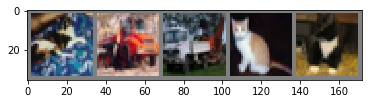

In [5]:
show_images.show_random_images(trainloader, classes)

In [6]:
import model
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = model.ResNet18()
my_model = net.to(device)
summary(my_model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(my_model.parameters(), lr=0.1, momentum=0.9)

In [9]:
EPOCHS = 5
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_test.train(my_model, device, trainloader, optimizer, criterion, epoch)
    train_test.test(my_model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.5711935758590698 Batch_id=390 Accuracy=34.91: 100%|██████████| 391/391 [00:28<00:00, 14.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 4585/10000 (45.85%)

EPOCH: 2


Loss=1.3111237287521362 Batch_id=390 Accuracy=53.32: 100%|██████████| 391/391 [00:28<00:00, 14.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 5718/10000 (57.18%)

EPOCH: 3


Loss=0.9236510396003723 Batch_id=390 Accuracy=64.98: 100%|██████████| 391/391 [00:28<00:00, 14.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 6677/10000 (66.77%)

EPOCH: 4


Loss=0.7174775004386902 Batch_id=390 Accuracy=72.58: 100%|██████████| 391/391 [00:29<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7312/10000 (73.12%)

EPOCH: 5


Loss=0.5156810283660889 Batch_id=390 Accuracy=78.18: 100%|██████████| 391/391 [00:29<00:00, 14.51it/s]



Test set: Average loss: 0.0056, Accuracy: 7554/10000 (75.54%)



In [1]:
evaluate.show_predicted_actual(my_model, device, testloader, classes)

NameError: ignored

In [2]:
evaluate.evaluate_accuracy(my_model, device, testloader)

NameError: ignored

In [12]:
evaluate.evaluate_classwise_accuracy(my_model, device, classes, testloader)

Accuracy of plane : 76 %
Accuracy of   car : 77 %
Accuracy of  bird : 46 %
Accuracy of   cat : 56 %
Accuracy of  deer : 64 %
Accuracy of   dog : 62 %
Accuracy of  frog : 76 %
Accuracy of horse : 75 %
Accuracy of  ship : 86 %
Accuracy of truck : 86 %
